In [80]:
# Ethan Nguyen Sec A

DS 256 Data Science Programming, Fall 2024

Prof Eatai Roth

## Problem Set 5
Due 11/14/2024 by 8p

## Titanic Pandas
(sounds cute...is not)

In this assignment, we'll explore the titanic training data set. These data represent a portion of the passenger manifest of the Titanic, detailing the passengers and whether or not they survived the fateful crash.

The columns are mostly self-explanatory. Key to less-obvious columns:
 - Sex - male=1 / female=0 
 - Parch - number of parents/children traveling with
 - SibSp - numbers of siblings/spouses traveling with
 - PClass - ticket class (like first class, business, economy)


 To start, you should import packages, ```pandas``` (as pd) and ```matplotlib.pyplot``` (as plt). Then load the data from ```titanic_train_clean.csv``` into a pandas dataframe.

 Feel free to add more code blocks if needed. When making figures, don't forget to label axes and provide titles and legends when appropriate.

In [83]:
# Add the boilerplate code for importing the required packages and data
import pandas as pd
import matplotlib.pyplot as plt
titanic_data = pd.read_csv('titanic.csv')
print(titanic_data.head())




    Age Cabin Embarked     Fare  \
0  22.0   NaN        S   7.2500   
1  38.0   C85        C  71.2833   
2  26.0   NaN        S   7.9250   
3  35.0  C123        S  53.1000   
4  35.0   NaN        S   8.0500   

                                                Name  Parch  PassengerId  \
0                            Braund, Mr. Owen Harris      0            1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...      0            2   
2                             Heikkinen, Miss. Laina      0            3   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)      0            4   
4                           Allen, Mr. William Henry      0            5   

   Pclass  Sex  SibSp  Survived            Ticket Title  Family_Size  
0       3    1      1         0         A/5 21171    Mr            1  
1       1    0      1         1          PC 17599   Mrs            1  
2       3    0      0         1  STON/O2. 3101282  Miss            0  
3       1    0      1         1            11380

## Homework Problems

For each of the problems, you'll write some code to find the answer. If there is a written/short answer component, use the provided text field.

### Problem 1

 - How many passengers are recorded in this log?
 - What percentage are male?
 - What percentage survived?

Hint: You can find these three answers with a single command.

In [86]:
# Calculating the required statistics
total_passengers = len(titanic_data)
percentage_male = (titanic_data['Sex'].mean()) * 100
percentage_survived = (titanic_data['Survived'].mean()) * 100

# Displaying the results
print(total_passengers)
print(percentage_male)
print(percentage_survived)


891
64.75869809203144
38.38383838383838


Your written answer:

 - Total number of passengers: 891
 - Percentage of male passengers: 64.76%
 - Percentage of passengers who survived: 38.38%

### Problem 2:

 - What percentage of female passengers survived?
 - What percentage of male passengers survived?

In [89]:
# Grouping by the 'Sex' column and calculating the mean survival rate
survival_rates = titanic_data.groupby('Sex')['Survived'].mean()

# Calculating the percentage of female and male passengers who survived
percentage_female_survived = survival_rates[0] * 100  
percentage_male_survived = survival_rates[1] * 100    

print(percentage_female_survived)
print(percentage_male_survived)


74.20382165605095
18.890814558058924


Your written answer:

 - Percentage of female passengers who survived: 74.20%
 - Percentage of male passengers who survived: 18.89%

### Problem 3

Use ```groupby``` and ```agg``` to find the percentage of the total tickets and the survivorship percentage for each class of ticket.

In [92]:
# Grouping by 'Pclass' and calculating 
ticket_stats = titanic_data.groupby('Pclass').agg(
    Total_Tickets=('PassengerId', 'count'),
    Survivorship_Percentage=('Survived', 'mean')
)

ticket_stats['Percentage_of_Total_Tickets'] = (ticket_stats['Total_Tickets'] / total_passengers) * 100
ticket_stats['Survivorship_Percentage'] = ticket_stats['Survivorship_Percentage'] * 100

print(ticket_stats)


        Total_Tickets  Survivorship_Percentage  Percentage_of_Total_Tickets
Pclass                                                                     
1                 216                62.962963                    24.242424
2                 184                47.282609                    20.650954
3                 491                24.236253                    55.106622


Your written answer:

 - Class 1 
    - % tickets: 24.24%
    - % survivorship: 62.96%
- Class 2 
    - % tickets: 20.65%
    - % survivorship: 47.28%
- Class 3
    - % tickets: 55.1%
    - % survivorship: 24.23% 


### Problem 4

Create two new dataframes corresponding to survivors and non-survivors keeping only the columns: age, name, and sex. Display the first five rows of these new dataframes.

Create a figure showing the distribution of age by sex and survivorship (four histograms on the same axes: male-survivors, female-survivors, male-unlucky, female-unlucky). Choose colors and histtype (see the [documentation for histogram](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html)) to make this figure easy to read and interpret.

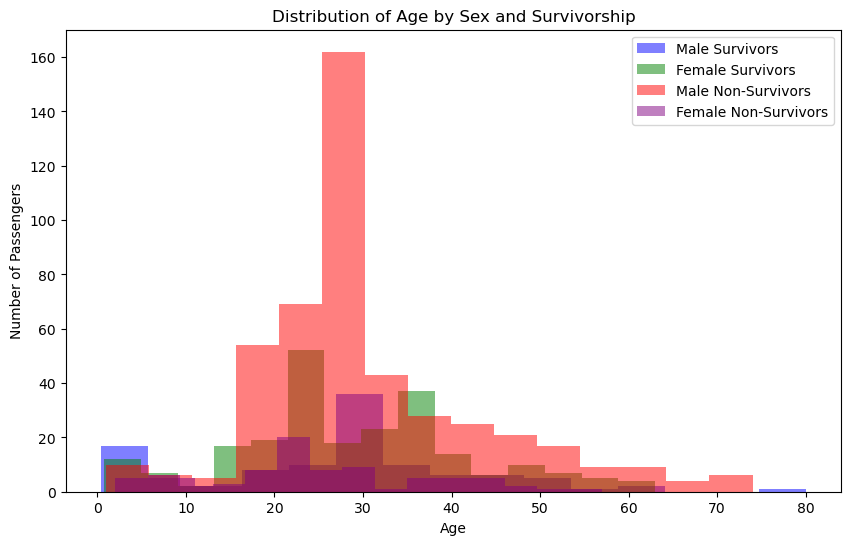

In [95]:

# Create DataFrames for survivors and non-survivors
survivors = titanic_data[titanic_data['Survived'] == 1][['Age', 'Name', 'Sex']]
non_survivors = titanic_data[titanic_data['Survived'] == 0][['Age', 'Name', 'Sex']]

# Create a figure showing the distribution of age by sex and survivorship
plt.figure(figsize=(10, 6))

# Histogram for male survivors
plt.hist(survivors[survivors['Sex'] == 1]['Age'].dropna(), 
         bins=15, alpha=0.5, label='Male Survivors', color='blue', histtype='bar')

# Histogram for female survivors
plt.hist(survivors[survivors['Sex'] == 0]['Age'].dropna(), 
         bins=15, alpha=0.5, label='Female Survivors', color='green', histtype='bar')

# Histogram for male non-survivors
plt.hist(non_survivors[non_survivors['Sex'] == 1]['Age'].dropna(), 
         bins=15, alpha=0.5, label='Male Non-Survivors', color='red', histtype='bar')

# Histogram for female non-survivors
plt.hist(non_survivors[non_survivors['Sex'] == 0]['Age'].dropna(), 
         bins=15, alpha=0.5, label='Female Non-Survivors', color='purple', histtype='bar')

# Adding labels, title, and legend
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.title('Distribution of Age by Sex and Survivorship')
plt.legend()

# Display
plt.show()


### Problem 5

Now that we've inspected the data, let's build a classifier (you'll compare two models) that predicts which passengers survived. These are the steps you should take:

 - Choose your features. The label will be survivorship.
 - Split the data into training and test sets.
 - Standardize the values using StandardScaler
 - Choose two of the following model types: KNN, SVM, Decision Tree. Create those models and select hyper-parameters.
 - Fit your models to the training data.
 - Apply the fit models to create predictions from the test data.
 - For each model, create a confusion matrix for the training and test data. You may want to revisit the hyper-parameters and re-fit the models.

 - Answer the questions at the bottom of the code block.

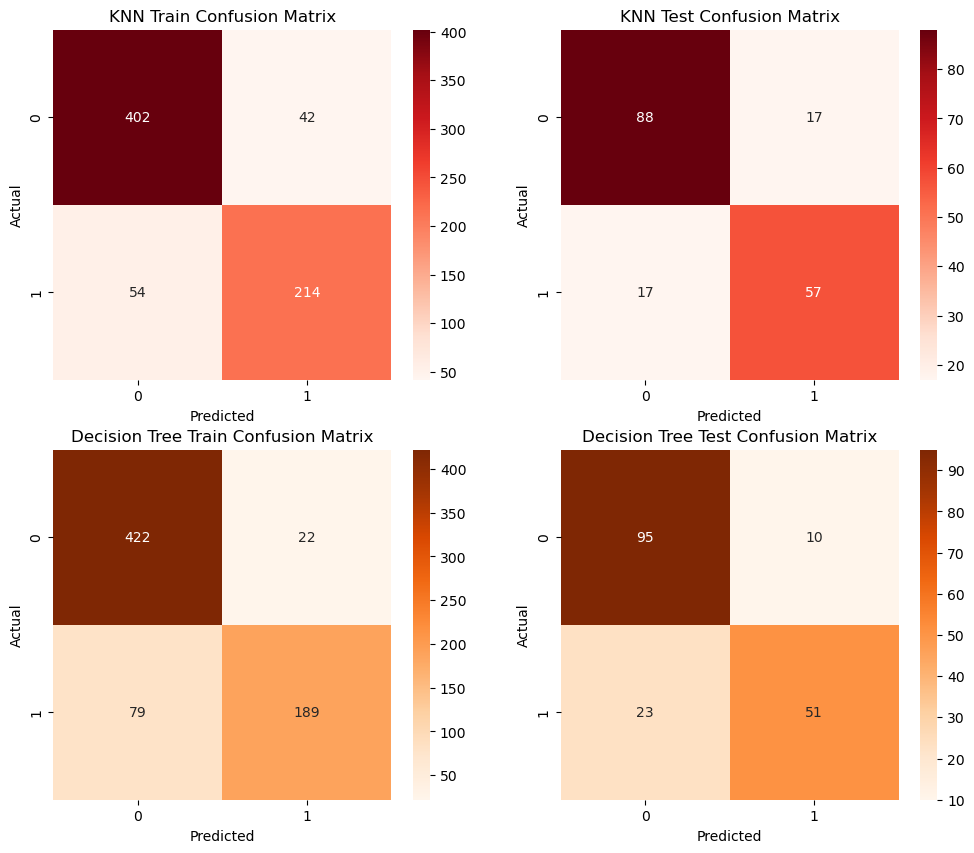

KNN Training Accuracy: 0.8651685393258427
KNN Testing Accuracy: 0.8100558659217877
Decision Tree Training Accuracy: 0.8581460674157303
Decision Tree Testing Accuracy: 0.8156424581005587


In [97]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

# Choosing features and label
features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex'] 
titanic_data['Sex'] = titanic_data['Sex'].replace({1: 1, 0: 0})  # Ensure Sex is numeric if necessary
titanic_data.dropna(subset=features, inplace=True)  # Drop rows with missing values in selected features

X = titanic_data[features]
y = titanic_data['Survived']

# Training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Creating and training the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Creating and training the Decision Tree model
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)

# Making predictions with both models
knn_train_pred = knn_model.predict(X_train)
knn_test_pred = knn_model.predict(X_test)

dt_train_pred = dt_model.predict(X_train)
dt_test_pred = dt_model.predict(X_test)

# Calculating and displaying confusion matrices
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
sns.heatmap(confusion_matrix(y_train, knn_train_pred), annot=True, fmt='d', cmap='Reds', ax=axes[0, 0])
axes[0, 0].set_title('KNN Train Confusion Matrix')
axes[0, 0].set_xlabel('Predicted')
axes[0, 0].set_ylabel('Actual')

sns.heatmap(confusion_matrix(y_test, knn_test_pred), annot=True, fmt='d', cmap='Reds', ax=axes[0, 1])
axes[0, 1].set_title('KNN Test Confusion Matrix')
axes[0, 1].set_xlabel('Predicted')
axes[0, 1].set_ylabel('Actual')

sns.heatmap(confusion_matrix(y_train, dt_train_pred), annot=True, fmt='d', cmap='Oranges', ax=axes[1, 0])
axes[1, 0].set_title('Decision Tree Train Confusion Matrix')
axes[1, 0].set_xlabel('Predicted')
axes[1, 0].set_ylabel('Actual')

sns.heatmap(confusion_matrix(y_test, dt_test_pred), annot=True, fmt='d', cmap='Oranges', ax=axes[1, 1])
axes[1, 1].set_title('Decision Tree Test Confusion Matrix')
axes[1, 1].set_xlabel('Predicted')
axes[1, 1].set_ylabel('Actual')

plt.show()

# Calculating and printing accuracy
print("KNN Training Accuracy:", accuracy_score(y_train, knn_train_pred))
print("KNN Testing Accuracy:", accuracy_score(y_test, knn_test_pred))
print("Decision Tree Training Accuracy:", accuracy_score(y_train, dt_train_pred))
print("Decision Tree Testing Accuracy:", accuracy_score(y_test, dt_test_pred))


#### **Questions**

How does the model performance on the test data compare to the performance on the training data? 
- Training accuracy is usually higher than test accuracy. A large accuracy gap suggests overfitting, while similar accuracies indicate a well-generalized model.
- KNN: Good if training and test accuracies are close; otherwise, it may be overfitting.
- Decision Tree: Often more complex and prone to overfitting, especially with high training but low test accuracy.

Which models did you fit and which worked better?
- The better model has higher test accuracy with a balanced confusion matrix.
- If Decision Tree has higher test accuracy, it’s preferable for complex patterns.
- If KNN shows comparable performance on both sets, it’s generally more robust. 
